<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week09-KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

# Logistic Regression

In [ ]:
from sklearn.datasets import make_classification
import numpy as np

# Sigmoid function

In [ ]:
def sigmoid(z):
    """ sigmoid """
    return 1 / (1 + np.exp(-z))

# Cost function

In [ ]:
def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    print("h = ",h)
    cost = -1* (1/m)*(np.matmul(-y.T, np.log(h)) + np.matmul((1 -y.T), np.log(1 - h)))
    return cost

# Gradient descent

In [ ]:
def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(theta.T.dot(x.T))
    error = h-y
    grad = x.T.dot(error.T)
    theta = theta - (alpha * grad)/m
    return theta

# Training model

In [ ]:
X, Y = make_classification(n_samples=10, n_features=4, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

X_b = np.c_[np.ones((X.shape[0],1)),X]

n_iterations = 10
learning_rate = 0.3

Theta = np.random.random((X_b.shape[1],1))

for i in range(n_iterations):
    Theta = gradient_Descent(Theta, learning_rate, X_b, Y)
    #if i % 5 == 0:
        #print("Cost = ", cost(X_b, Y, Theta))
        #print("Theta = ", Theta)

h = sigmoid(Theta.T.dot(X_b.T))
print("h = ",h)
print((h > .5).astype(int) )

h =  [[0.95135677 0.36155637 0.87147793 0.25479928 0.38349134 0.33996574
  0.26460615 0.47701155 0.89142937 0.66877629]]
[[1 0 1 0 0 0 0 0 1 1]]


# SKLearn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

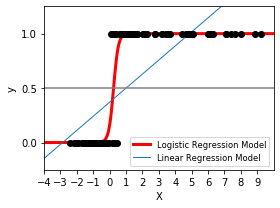

In [ ]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

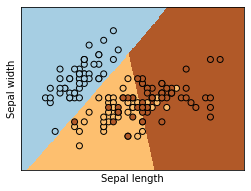

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()